# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | leongatha
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | castillos
Processing Record 10 of Set 1 | labytnangi
Processing Record 11 of Set 1 | winejok
City not found. Skipping...
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | masterton
Processing Record 17 of Set 1 | mugia
Processing Record 18 of Set 1 | espargos
City not found. Skipping...
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | rev

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,20.44,90,100,2.06,US,1706631681
1,leongatha,-38.4833,145.9500,9.92,95,11,0.40,AU,1706631681
2,longyearbyen,78.2186,15.6401,-4.09,68,75,6.17,SJ,1706631681
3,bilibino,68.0546,166.4372,-33.17,99,100,1.07,RU,1706631682
4,bethel,41.3712,-73.4140,2.33,68,100,0.00,US,1706631682


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label = "City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col = "City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,20.44,90,100,2.06,US,1706631681
1,leongatha,-38.4833,145.9500,9.92,95,11,0.40,AU,1706631681
2,longyearbyen,78.2186,15.6401,-4.09,68,75,6.17,SJ,1706631681
3,bilibino,68.0546,166.4372,-33.17,99,100,1.07,RU,1706631682
4,bethel,41.3712,-73.4140,2.33,68,100,0.00,US,1706631682


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

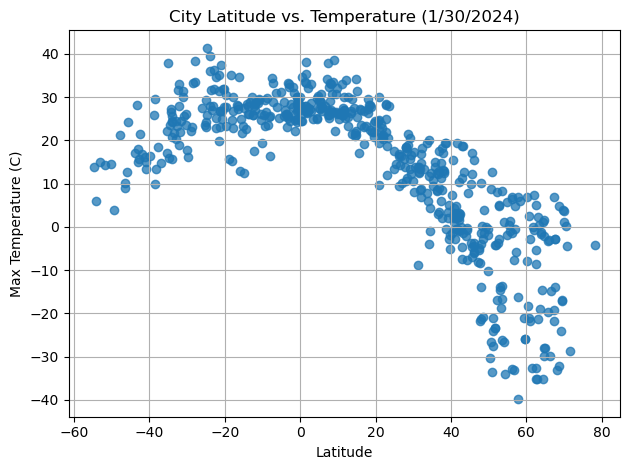

In [85]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature (1/30/2024)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

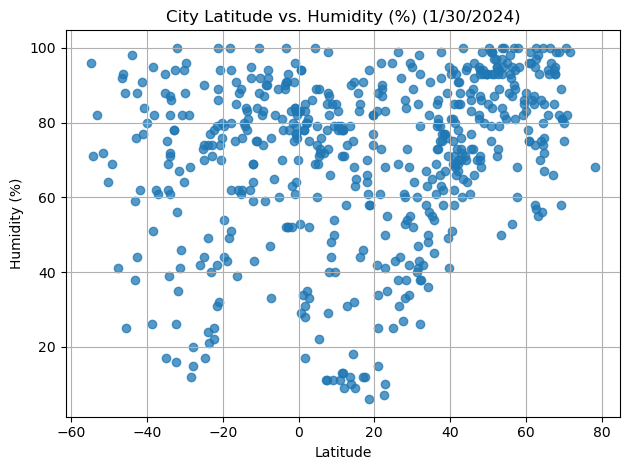

In [86]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) (1/30/2024)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

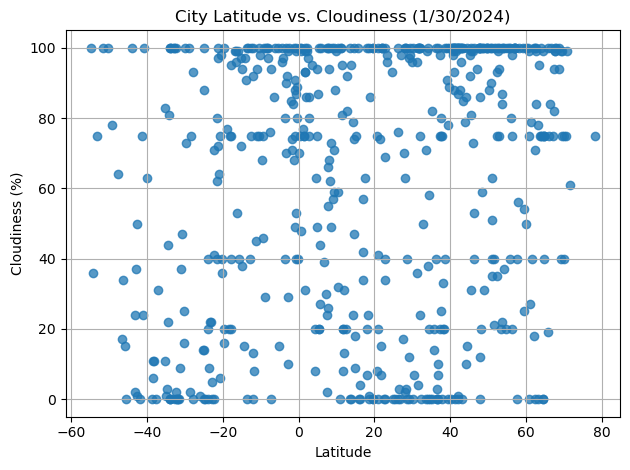

In [87]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (1/30/2024)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

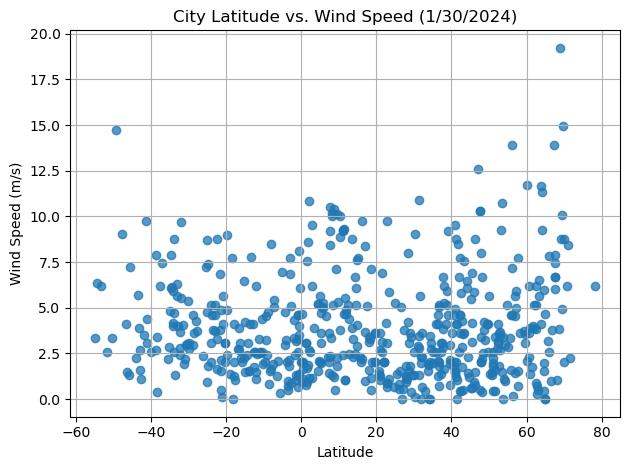

In [88]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed (1/30/2024)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, y_label, annotate_loc):
    
    # Linear Regression Data
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
    
    # Plot Scatterplot w/ Linear Regression Data
    # xlabel always Lat, ylabel changes...
    plt.scatter(x_values, y_values, alpha = 0.75)
    plt.grid(False) 
    plt.tight_layout()
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_loc, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,20.44,90,100,2.06,US,1706631681
2,longyearbyen,78.2186,15.6401,-4.09,68,75,6.17,SJ,1706631681
3,bilibino,68.0546,166.4372,-33.17,99,100,1.07,RU,1706631682
4,bethel,41.3712,-73.4140,2.33,68,100,0.00,US,1706631682
5,isafjordur,66.0755,-23.1240,-2.98,93,75,2.57,IS,1706631682


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,leongatha,-38.4833,145.9500,9.92,95,11,0.40,AU,1706631681
6,papatowai,-46.5619,169.4708,10.27,92,17,4.11,NZ,1706631682
7,blackmans bay,-43.0167,147.3167,15.07,76,37,2.68,AU,1706631557
8,castillos,-34.1667,-53.8333,27.28,39,81,4.16,UY,1706631683
10,saint-pierre,-21.3393,55.4781,26.82,89,100,1.54,RE,1706631684


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8488188366802093


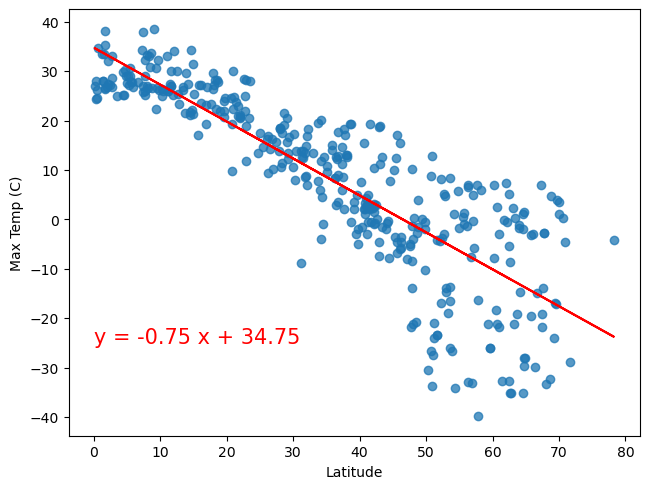

In [92]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plots(x_values, y_values, "Max Temp (C)", (0,-25))

The r-value is: 0.4964569374062928


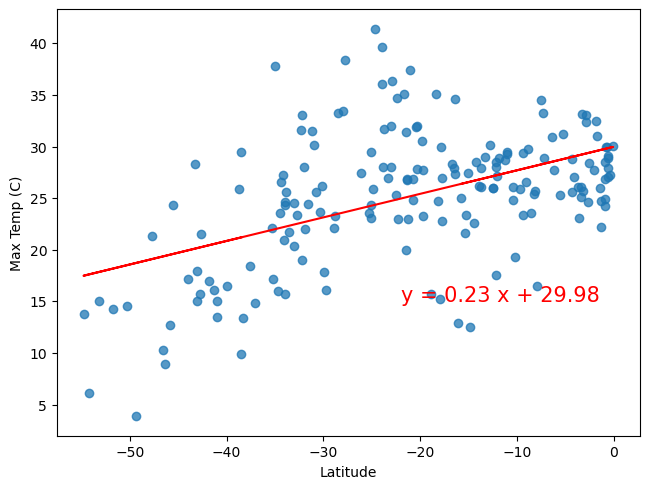

In [93]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plots(x_values, y_values, "Max Temp (C)", (-22,15))

**Discussion about the linear relationship:** By viewing the graphs above, we can see that Latitude and Max Temperature are directly proportional. For both hemispheres it is clear to see that as we approach 0 Latitude (equator) the Max Temperature increases, and the further away from 0 Latitude we go the Max Temperature will decrease.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4295294285164187


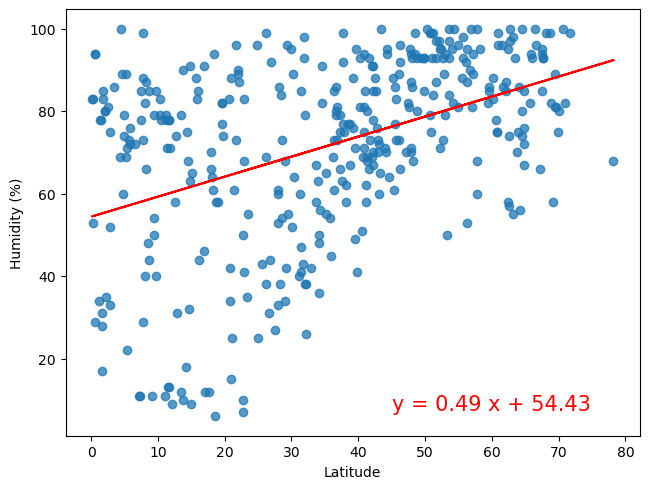

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plots(x_values, y_values, "Humidity (%)", (45,7.5))

The r-value is: 0.16093722675130154


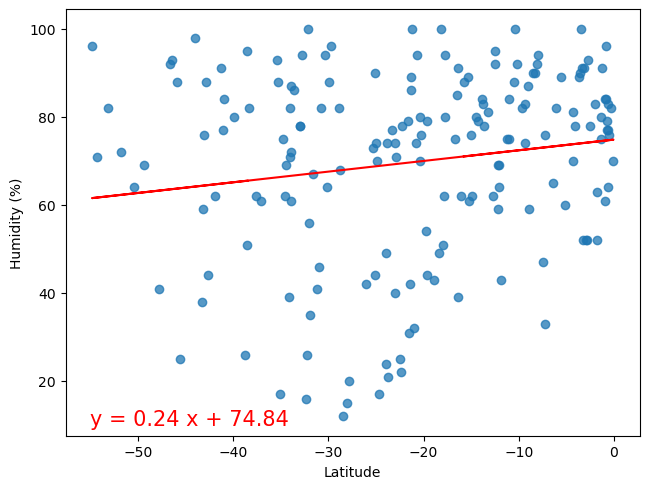

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plots(x_values, y_values, "Humidity (%)", (-55,10))

**Discussion about the linear relationship:** By viewing the graphs above, we can see that Latitude and Humidity have almost no relationship to view. In the northern hemisphere there is a greater correlation, however in the southern we can see that the r-value is nearly zero, implying that there is no linear association between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1387929132437828


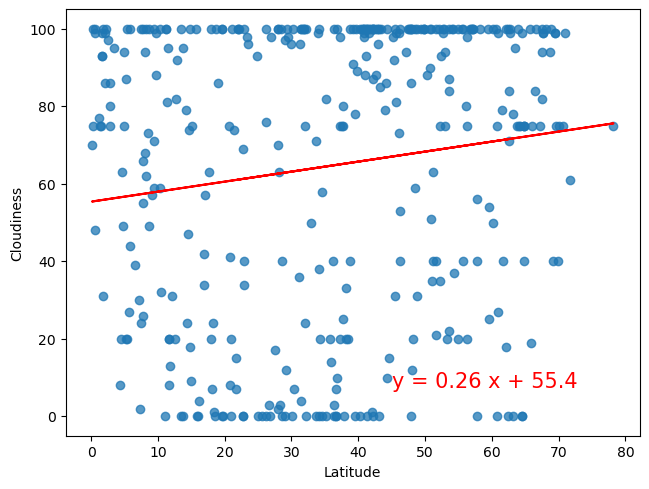

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plots(x_values, y_values, "Cloudiness", (45,7.5))

The r-value is: 0.33795220972886764


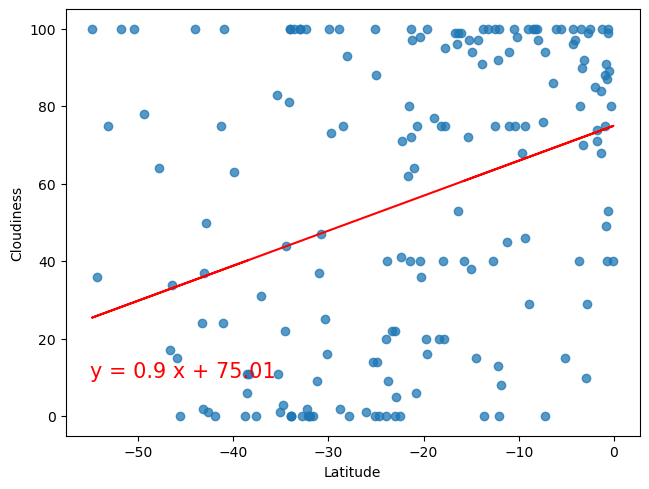

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plots(x_values, y_values, "Cloudiness", (-55,10))

**Discussion about the linear relationship:** By viewing the graphs above, we can see that Latitude and Cloudiness have almost no relationship to speak of. Compared to Latitude and Humidity, we can see that these 2 graphs have a similar r-value of ~0.2, this shows that there is a slight correlation but nothing large enough to consider usable.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07446959940629526


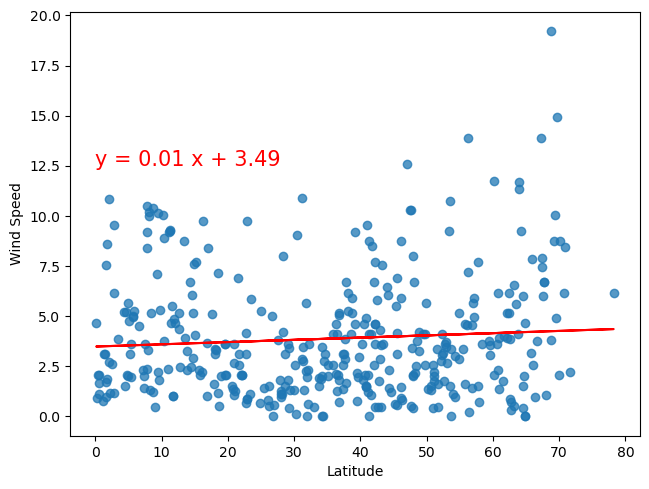

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plots(x_values, y_values, "Wind Speed", (0,12.5))

The r-value is: -0.2537028096118486


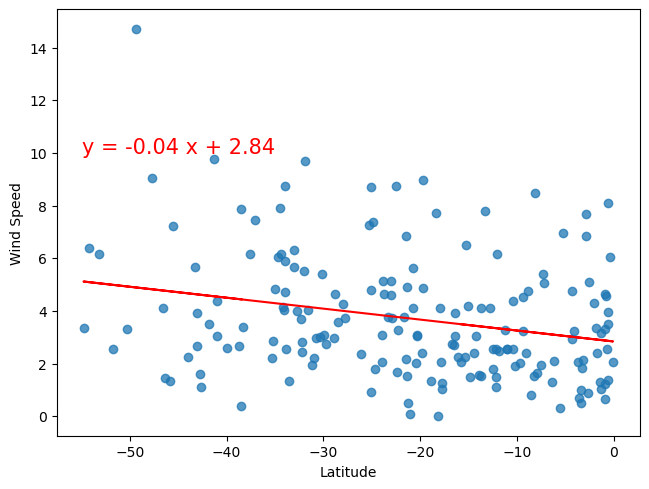

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plots(x_values, y_values, "Wind Speed", (-55,10))

**Discussion about the linear relationship:** By viewing the graphs above, we can see that Latitude and Cloudiness have literally no relationship to speak of whatsoever. Both the northern and southern hemispheres show that there is no change in wind speed as we get closer to or further away from 0 Latitude. They both have r-values of ~0.1 showing that these variables have basically no correlation.